In [8]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd

In [2]:
time = np.array([0,15])
y1 = np.array([288,158])
y2 = np.array([288,166])
y3 = np.array([288,225])

In [ ]:
# Defining constants

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy.stats as stats
from scipy.stats import skewnorm
import scipy as sp

def dataimporter(filename,header=70,undregräns_b=2,övregränds_b=2.7):
    # Reading in the data file, removing header and converting it to a matrix
    data = pd.read_csv(filename, header=header)
    nummer = data.to_numpy()
    nummerdata = np.asarray(nummer[:-1,:], dtype="float")
    data = nummerdata
    
    
    return data


def dataimporterclean(filename,header=70):
    # Reading in the data file, removing header and converting it to a matrix
    data = pd.read_csv(filename, header=header)
    nummer = data.to_numpy()
    nummerdata = np.asarray(nummer[:-1,:], dtype="float")
    return nummerdata

def bakgrund(x,c1,c2):
    return c1*x+c2

def plotter(ax,data,zo,colour,label,alpha = 1):
    # Function to plot spectrum
    ax.plot(data[:,0],data[:,1],zorder=zo, lw = 4, color = colour, label =label,alpha=alpha)
    ax.fill_between(data[:,0],data[:,1],zorder=zo, color = colour,alpha=alpha)
   
def find_nearest(array, value):
    # Function for finding closest value in array
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

def data_integration(data,under=2,over=2.8,marginal=0.1):
    # Function to integrate the data between energies
    array = np.array([])
    for i in (data):
        intunder = np.where(i[:,0]==find_nearest(i[:,0],under))[0][0]
        intover = np.where(i[:,0]==find_nearest(i[:,0],over))[0][0]
        # print(intunder,intover)
        x=i[intunder:intover,0]
        y = i[intunder:intover,1]
        
        mitten = x[np.argmax(y)]

        u = np.where(x==find_nearest(x,mitten-marginal))[0][0]
        ö = np.where(x==find_nearest(x,mitten+marginal))[0][0]
        x=x[u:ö]
        y = y[u:ö]

        poptnorm,pcov = sp.optimize.curve_fit(norm,xdata=x,ydata=y,p0=[1,1,1])
        
        top1 =  np.sum(norm(x,*poptnorm))
        array = np.append(array,top1)
    return array


def data_integrationold(data,under=2.2,over=2.6,avgunder=2.65,avgover=2.8 ):
    # Function to integrate the data between energies
    array = np.array([])
    for i in (data):
        intunder = np.where(i[:,0]==find_nearest(i[:,0],under))
        intover = np.where(i[:,0]==find_nearest(i[:,0],over))
        placeunder = np.where(i[:,0]==find_nearest(i[:,0],avgunder))
        placeover = np.where(i[:,0]==find_nearest(i[:,0],avgover))
        
        intunder = np.reshape(intunder,-1)
        intover = np.reshape(intover,-1)
        placeunder = np.reshape(placeunder, -1)
        placeover = np.reshape(placeover, -1)

        # i[:,1] = i[:,1]-np.average(i[placeunder[0]:placeover[0],1])

        top1 = np.sum(i[intunder[0]:intover[0],1])
        array = np.append(array,top1)
    return array

def predict(signal,c):
    return c[0]*signal + c[1]

def readfile(arraynames):
    # Funstion to make it possible to import multiple files at the same time
    meaner = np.array([])
    for i in arraynames:
        temp = dataimporter(i)
        meaner = np.append(meaner,data_integration([temp]))
    return meaner


def skew_normal(x, a, loc, scale,amp):
    return amp*skewnorm.cdf(x, a, loc=loc, scale=scale)

def skew_normal_pdf(x, a, loc, scale,amp):
    return amp*skewnorm.pdf(x, a, loc=loc, scale=scale)
def norm(x,a,mean,sigma):
    return a*stats.norm.pdf(x,mean,sigma)

Molines = [2.29316, 2.28985, 2.39481, 2.5183]
Silines = [1.73998,1.73938, 1.83594]
Slines = [2.30784,2.30664,2.46404]
Olines =[0.5249] 
Nticks = 20
xmax = 5
xmin = 0
ymax = 2000

# Creating plot figure and tick formating function
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
fmt = lambda x, pos: '{}'.format(x).rstrip('0')


# Plotting spectrum
plotter(ax,dataimporter("Spectras 300724/C15A1_10k_310724_2.txt"),6,"green",None)

ax.vlines(Slines,0,ymax,colors="black",linestyles="dashed",zorder=7,label="blabal")

# Setting parameters for plot axes
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right',fontsize=14)
plt.setp(ax.get_yticklabels(),fontsize=14)
ax.xaxis.set_major_locator(ticker.MaxNLocator(Nticks))
ax.grid(zorder = 1)

#Limits in the graph
ax.set_xlim([xmin,xmax])
ax.set_ylim([0,ymax])
#Colours for the plot
ax.set_facecolor((0.1, 0.5, 0.8))
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.xaxis.label.set_color('black')
ax.tick_params(colors=(0.2, 0.2, 0.2), which ='both')
ax.legend(bbox_to_anchor=(0.5, 0.6, 0.5, 0.5),draggable=True)

#Text for plot
ax.set_xlabel("Energy (keV)",fontsize=14)
ax.set_ylabel("Count (cps/eV)",fontsize=14)
ax.set_title("EDS spectrum",fontsize=16)

plt.show()

Using matplotlib backend: <object object at 0x105df79a0>


: 

4.33708


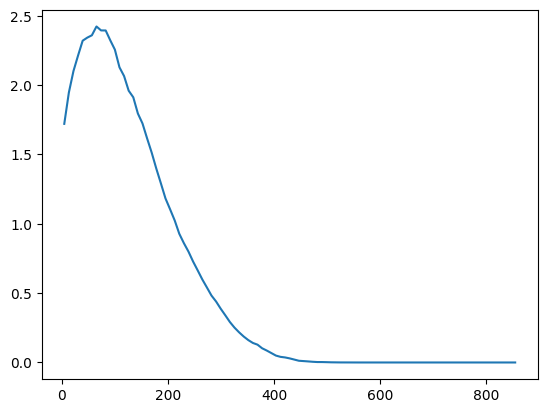

In [197]:
keV11 = pd.read_csv("Xray/10k_mos2_alpha1",delimiter="\t")
datakeV11 = np.hstack((np.reshape(keV11["z (nm)"].to_numpy(),(len(keV11["PRZ(pz) Emi"].to_numpy()),1)),np.reshape(keV11["PRZ(pz) Emi"].to_numpy(),(len(keV11["PRZ(pz) Emi"].to_numpy()),1))))
plt.plot(datakeV11[:,0],datakeV11[:,1])
print(datakeV11[0,0])
# plt.xlim((0,10))

plt.show()

/var/folders/nz/w1y866l54cd210lbkmf1cn0m0000gp/T/ipykernel_38827/39136866.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  test = pd.read_csv("grand.dat",header=81,on_bad_lines="error",skip_blank_lines="True",sep="\t",quotechar='"',skipfooter=1)


(84310,) (84310,)


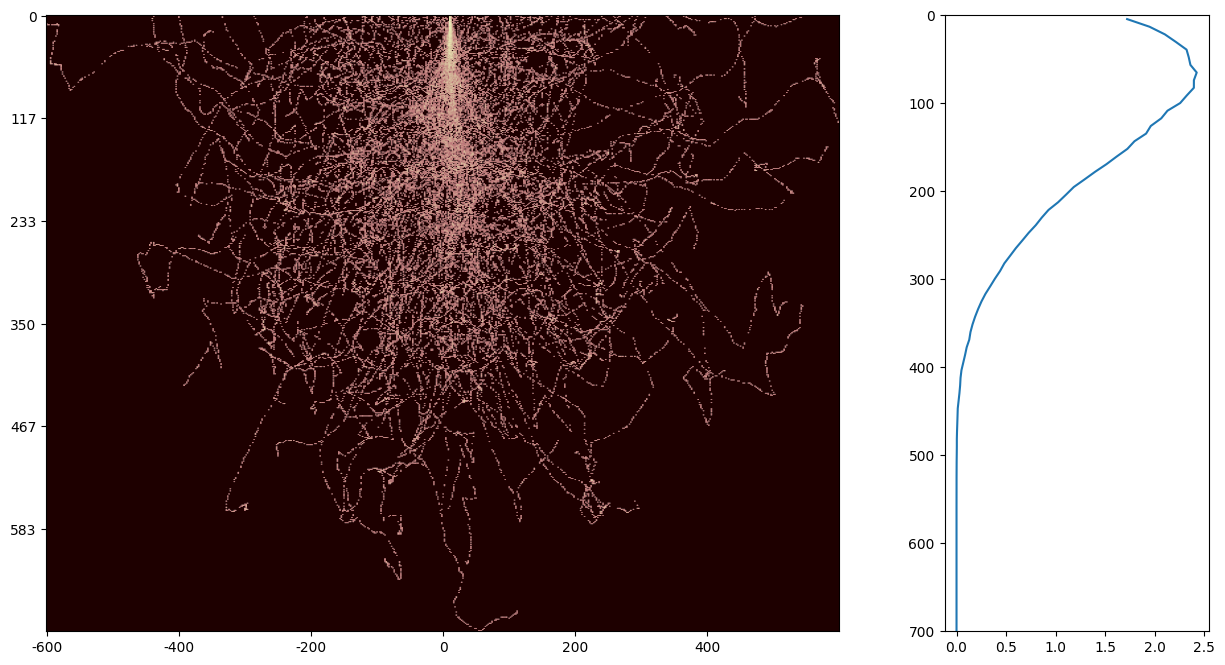

In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


test = pd.read_csv("grand.dat",header=81,on_bad_lines="error",skip_blank_lines="True",sep="\t",quotechar='"',skipfooter=1)

x = test["X"].to_numpy()
z = test["Z"].to_numpy()
energy = test["Energy"].to_numpy()

print(energy.shape, x.shape)

z = z[x!="X"]
energy = energy[x!="X"]
x = x[x!="X"]

z = z[x!='-----------------------------------------------------------------']
energy = energy[x!='-----------------------------------------------------------------']
x = x[x!='-----------------------------------------------------------------']


z = z[x!='Trajectory']
energy = energy[x!='Trajectory']
x = x[x!='Trajectory']


z = z[x!='Type : ']
energy = energy[x!='Type : ']
x = x[x!='Type : ']


z = z[x!='Collisions']
energy = energy[x!='Collisions']
x = x[x!='Collisions']


x = x.astype(float)
z = z.astype(float)
energy = energy.astype(float)

z = z[~np.isnan(x)]
energy = energy[~np.isnan(x)]
x = x[~np.isnan(x)]

energy = energy[~np.isnan(z)]
x = x[~np.isnan(z)]
z = z[~np.isnan(z)]


x = x[energy>2.2]
z = z[energy>2.2]

x = x[z>=0]
z = z[z>=0]


data = np.vstack((x,z)).T
# fig, ax = plt.subplots(1)
# ax.grid()
# ax.scatter(x,z,marker=".",linewidths=0.1,alpha=0.01)
# ax.yaxis.set_inverted(True)
# plt.show()

gridsize =600

def heatmap_from_xy(points, grid_size=(gridsize, gridsize), area=None, show=True):
    """
    Generate a heatmap from a list of (x, y) points.

    Parameters:
        points (list of tuples): List of (x, y) coordinates.
        grid_size (tuple): Number of bins in (x_bins, y_bins).
        area (tuple): (x_min, x_max, y_min, y_max). If None, bounds are auto-calculated.
        show (bool): Whether to display the heatmap.

    Returns:
        heatmap (2D array): Count of points in each grid cell.
    """

    # Determine bounds

    x_min, x_max = np.min(points[:, 0]), np.max(points[:, 0])
    y_min, y_max = np.min(points[:, 1]), np.max(points[:, 1])

    # 2D histogram
    heatmap, xedges, yedges = np.histogram2d(
        points[:, 0], points[:, 1],
        bins=grid_size,
        range=[[x_min, x_max], [y_min, y_max]]
    )

    if show:
        plt.imshow(heatmap.T, origin='lower', aspect='auto')
        plt.colorbar(label='Count')
        plt.title('Heatmap of Points')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.show()

    return heatmap


heat = heatmap_from_xy(data,show=False)

fig, ax = plt.subplots(1,2,figsize=(15, 8),width_ratios=[3, 1])
fig.set_figheight
ax.flatten()
ax[0].imshow(np.log(heat.T+0.1),cmap="pink" ,origin='lower', aspect='auto')
ax[0].yaxis.set_inverted(True)
# ax[0].xaxis.set_ticks(np.linspace(-600,600))

def fmty(x,pos):
    return f'{(x/gridsize)*700:.0f}'
def fmtx(x,pos):
    return f'{-600+(x/gridsize)*1200:.0f}'

ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(fmtx))
ax[0].yaxis.set_major_formatter(ticker.FuncFormatter(fmty))


ax[1].plot(datakeV11[:,1],datakeV11[:,0])
ax[1].yaxis.set_inverted(True)
ax[1].set_ylim((700,0))

plt.show()

[3.11924645e+04 1.96044379e+01]
31100.0


[]

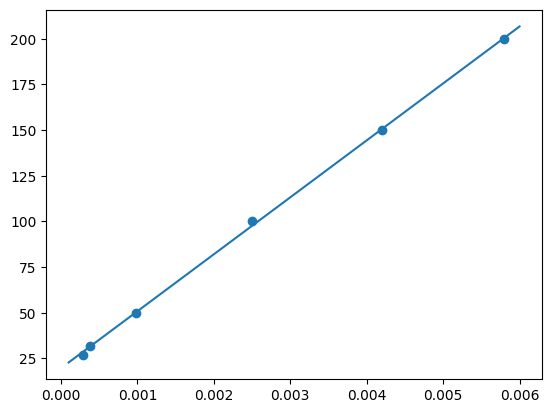

In [231]:
temps = np.array([290e-6,380e-6,980e-6,2.5e-3,4.2e-3,5.8e-3])
currents = np.array([27,32,50,100,150,200])

c = np.polyfit(temps,currents,1)
print(c)
print(3.11e4)
x = np.linspace(0.1e-3,6e-3,100)
plt.scatter(temps,currents)
plt.plot(x, x*c[0]+c[1])
plt.plot()

In [3]:
def ränt1(x):
    return 1*x
    

def ränt2(x):
    return 1*x

skuld = 373646
fondränt = 1.0885


print(376761*0.01981)


7463.635410000001


In [17]:
data = pd.read_csv("Monthly_Expenses_Summary.csv")

d = data.to_numpy()


print(np.sum(d[:,1]), len(d))


284707.93 11


In [19]:
284707.93-(60000+18000*12)

8707.929999999993